# Telecom Chuan Case Study

### Introduction
#### - What is the Churn

Generally, in industry with subsricption/yearly-renewal contract as the bases, the **Churn rate** refers to the proportion of customers who leave the company during a given time period.

<br>

#### - Why it is important to analysis the churn rate

By observating the churn rate and studying the factors of group who stays and group who leaves, it help the companies modify their products, services or marketing stretgy in a more competitive way to the market.

<br>

#### - Purpose of this case study

From the above, I am going to define the main purposes of this case study are:
1. Understanding the important features of customers who leaves
2. Build a model to predict the possibility of churn of a customer given his/her data

<br>


### Background Information

#### - Sources of data

The dataset that will applied for this case study is from Kaggle 

<br>

#### - Describe the data

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month - the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<br>

#### - Work Flow

This project will devided into the following parts:
1. Churn
2. Data anaylsis (with EDA)
3. Prediction models building
4. Deploy final model

For the first part, we will have a EDA on the dataset to find out insights that this dataset brought us; the second part will be the machine learning models construction, try to build a model that can predict the probability of the churn action from inputing some customers information.

# Ask 
#### Business Task
By predicting the Churn possibility of a customer, to develop a focused customer retention programs.

<br>

#### Key stakeholders
Who will be interested in this case study, who will be benefitted from this case study
- Management
- Marketing Team
- Operation Team 

<br>

#### Any Questions help to understand/ get to the main tasks
- What is the important features towards Churn rates?
  - Who are the most likey to churn?
  - What can be improve in order to keep the customer?

# Prepare

**Import libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

**Load data file**


In [3]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

**Observations:**

The dataset have 7043 observation records.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Observations:**
- SeniorCitizen is a catagory columns since it only have 1 and 0;
- 75% of customers have tenure less the 55 months and the means of tenure is 32.4 months;
- The average monthly charges is \$64.76, 25% of customers are paying more than \$89.85 per month

Lets take a look on the target class

No     5174
Yes    1869
Name: Churn, dtype: int64

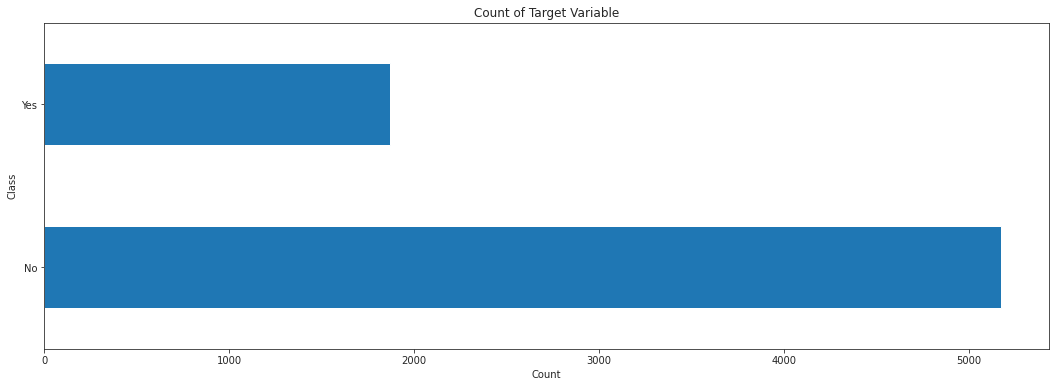

In [ ]:
plt.figure(figsize=(18,6))
df["Churn"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Count of Target Variable")

df["Churn"].value_counts()

Since the target class only have Yes or No, so it is a binery classification problem. **And We have an imbalance target variale distribution in class, we have to take this imbalance situation into account in the after analysis and solve it before building our models.**

In [ ]:
# Feature dtypes
def df_summary(df):
    '''
    input the dataframe, and it will return a summary table with columns datails.
    '''
    #create a dataframe call summary
    summary = pd.DataFrame(df.dtypes, columns=['dtype'])

    # Number of Missing values (-1 count)
    summary['num_missing'] = df.isna().sum().values    

    # Number of unique values by features
    summary['num_uniques'] = df.nunique().values
    
    return summary


In [ ]:
summary = df_summary(df)
summary

,dtype,num_missing,num_uniques
customerID,object,0,7043
gender,object,0,2
SeniorCitizen,int64,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,73
PhoneService,object,0,2
MultipleLines,object,0,3
InternetService,object,0,3
OnlineSecurity,object,0,3


In [ ]:
print("Unique values of each columns: ")
for col in df.columns:
  print(f"{col}: \n{df[col].unique()}\n")

Unique values of each columns: 
customerID: 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: 
['Female' 'Male']

SeniorCitizen: 
[0 1]

Partner: 
['Yes' 'No']

Dependents: 
['No' 'Yes']

tenure: 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: 
['No' 'Yes']

MultipleLines: 
['No phone service' 'No' 'Yes']

InternetService: 
['DSL' 'Fiber optic' 'No']

OnlineSecurity: 
['No' 'Yes' 'No internet service']

OnlineBackup: 
['Yes' 'No' 'No internet service']

DeviceProtection: 
['No' 'Yes' 'No internet service']

TechSupport: 
['No' 'Yes' 'No internet service']

StreamingTV: 
['No' 'Yes' 'No internet service']

StreamingMovies: 
['No' 'Yes' 'No internet service']

Contract: 
['Month-to-month' 'One year' 'Two year']

PaperlessBilling: 
['Yes' 'No']

PaymentMet

**Observations:**
- Seems like no N/A values in the dataset, while we still have to check the string, since the collector may input N/A data with string labels.
- TotalCharges should be in number format, we have to charge its dtype,
- Tenure is count in month, maybe we can transform it into year, and get a cross-check with Contract columns
- In MultipleService column, "No phone service" shares similar meaning with "No", should combine into "No", the same logic applied to "OnlineSecurity", 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

# Data Cleaning and Analysis

**Create a copy dataset to keep the original remain unchange**


In [ ]:
df_data = df.copy()

In [ ]:
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'], errors='coerce')
summary.loc["TotalCharges","dtype"] = "float64"

Since we have transform the Total Charges into numeric, lets check is any N/A data again.

In [ ]:
df_data.isna().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Lets have a deep look on the N/A data.

In [ ]:
df_data[df_data["TotalCharges"].isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Seems like nothing are very special here, lets drop them,

In [ ]:
df_data.dropna(inplace=True)

In [ ]:
df_data.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Then is the Tenure columns**

In [ ]:
df_data["tenure"].max()

72

In [ ]:
labels = [f"{i} - {i+11}" for i in range(1,72,12)]
df_data['tenure_group'] = pd.cut(df_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
df_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

For this case study, customer ID will not be applied, it will be droped with "tenure" together.

In [ ]:
df_data.drop(columns=["tenure","customerID"],inplace=True)

In [ ]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

### Univariate Analysis

In [ ]:
summary

,dtype,num_missing,num_uniques
customerID,object,0,7043
gender,object,0,2
SeniorCitizen,int64,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,73
PhoneService,object,0,2
MultipleLines,object,0,3
InternetService,object,0,3
OnlineSecurity,object,0,3


In [ ]:
# Put the columns into groups 
customer_count = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
contract_count = [ 'Contract', 'PaperlessBilling', 'PaymentMethod'] #  'MonthlyCharges', 'TotalCharges' is not catagories col.
phoneser_count = ['PhoneService', 'MultipleLines']
internetser_count = [ 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [ ]:
def uni_plot(categorical_list):
  df_categoric = df.loc[:, categorical_list]
  for i in categorical_list:
    plt.figure()
    plt.figure(figsize=(10,8))
    sns.countplot(x = i, data = df_categoric)
    plt.title(f"Distribution of {i}")
    # plt.xticks(rotation = 45)

<Figure size 432x288 with 0 Axes>

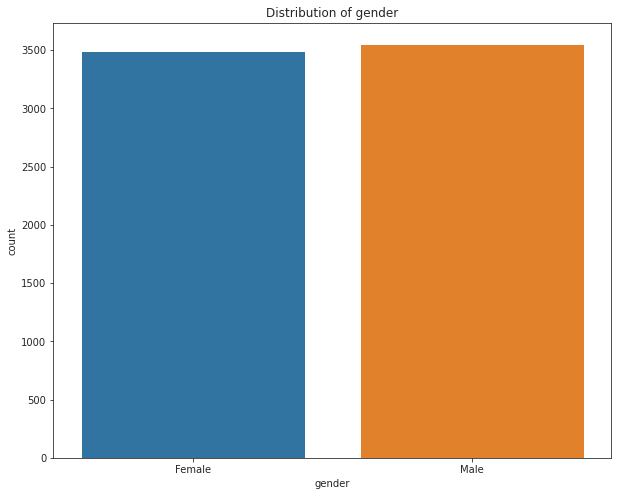

<Figure size 432x288 with 0 Axes>

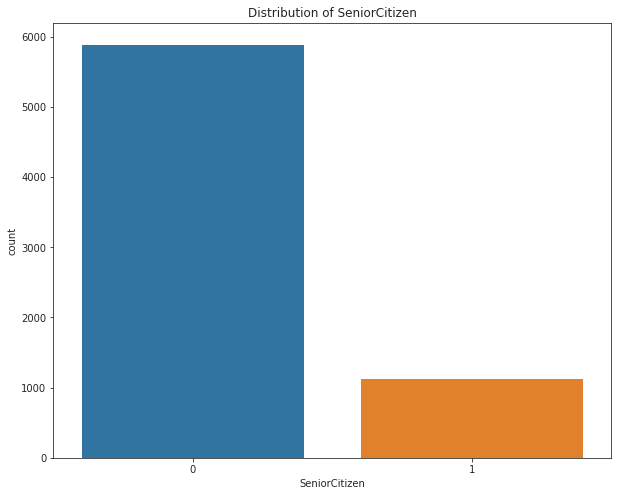

<Figure size 432x288 with 0 Axes>

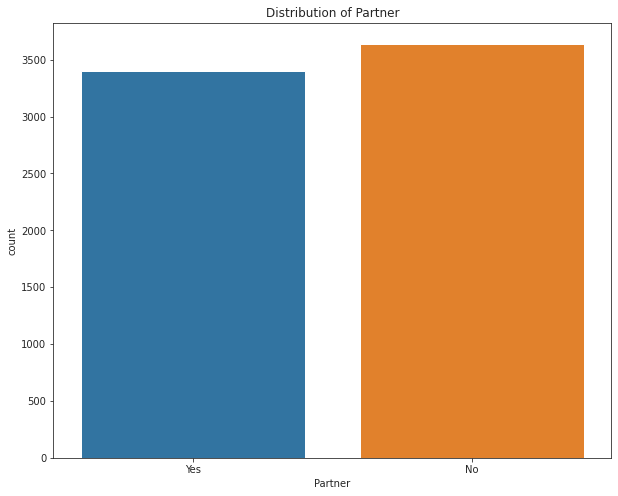

<Figure size 432x288 with 0 Axes>

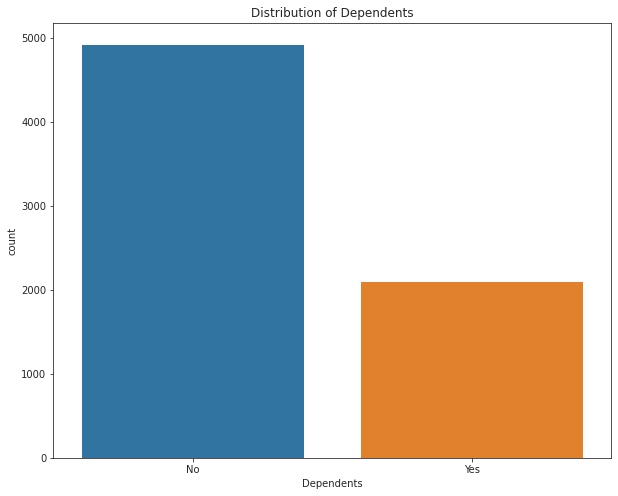

In [ ]:
uni_plot(customer_count)

**Observation:**
- Equal distribution in Gender, Partner,
- Most of our customers are not Senior Citizen, only 1/7 are Senior Citizen
- ⅔ of our customers are enconomic independents and ⅓ of our customers are enconomic dependent


<Figure size 432x288 with 0 Axes>

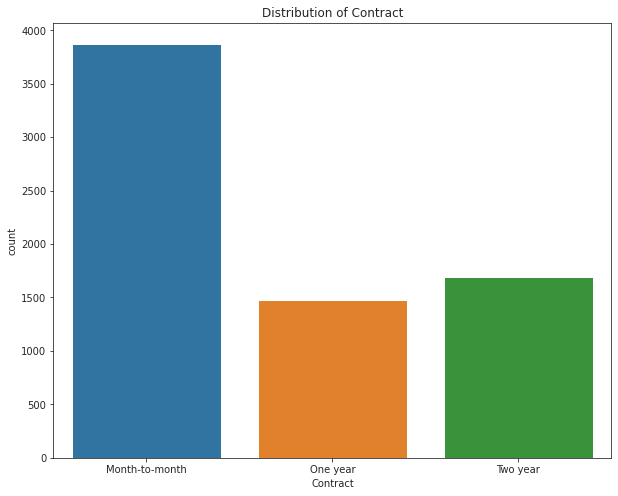

<Figure size 432x288 with 0 Axes>

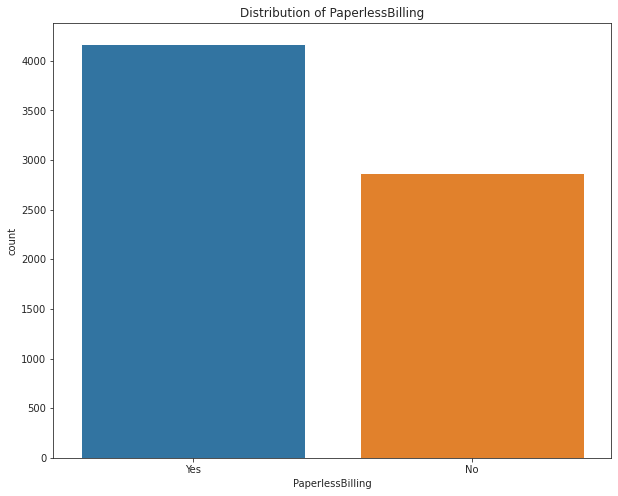

<Figure size 432x288 with 0 Axes>

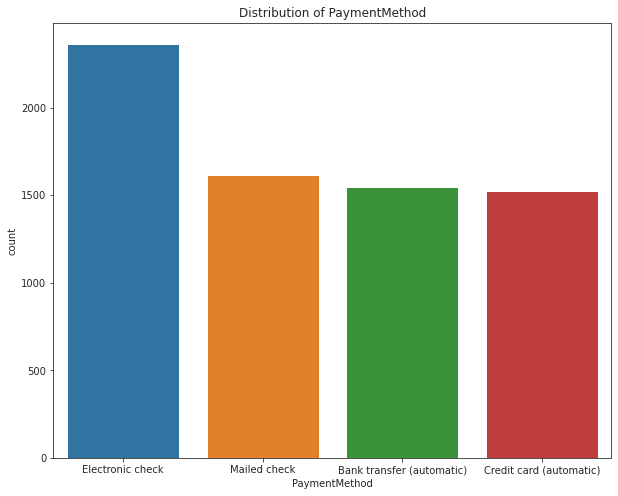

In [ ]:
uni_plot(contract_count)

**Observation**
- Around half of our customers signed **month-to-month contract** with us.
- More customers are going to pay with electronic check.


<Figure size 432x288 with 0 Axes>

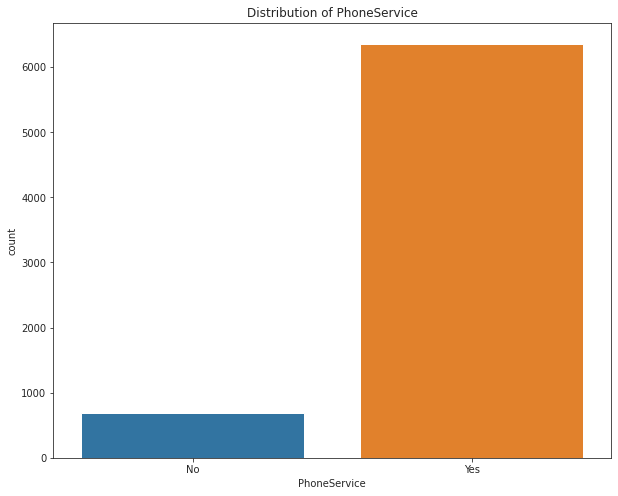

<Figure size 432x288 with 0 Axes>

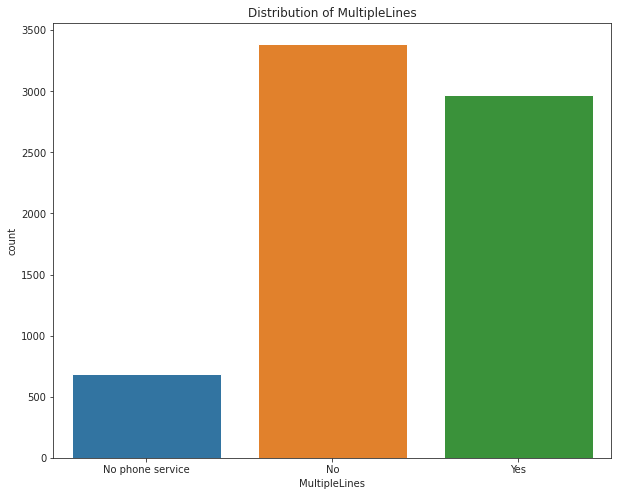

In [ ]:
uni_plot(phoneser_count)

**Observation**
- Most of our customers have used our phone services, among these customers, around ½ have multiple lines.

<Figure size 432x288 with 0 Axes>

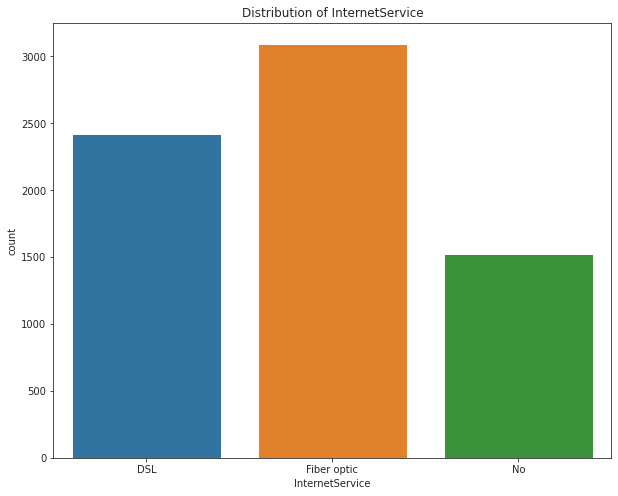

<Figure size 432x288 with 0 Axes>

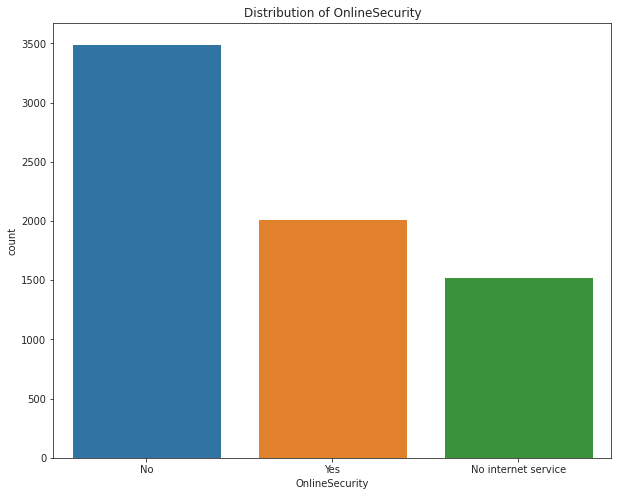

<Figure size 432x288 with 0 Axes>

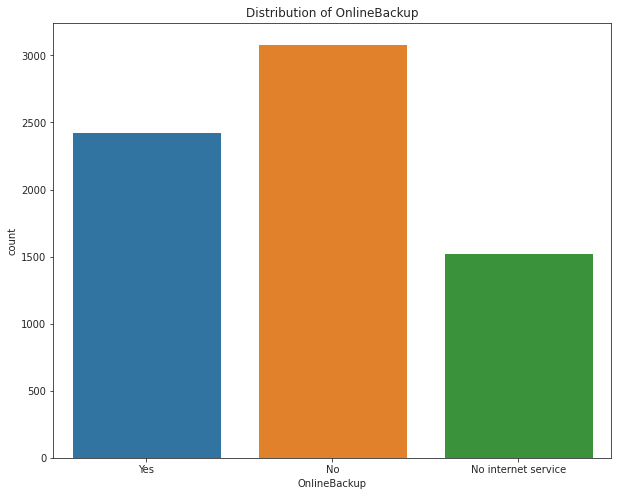

<Figure size 432x288 with 0 Axes>

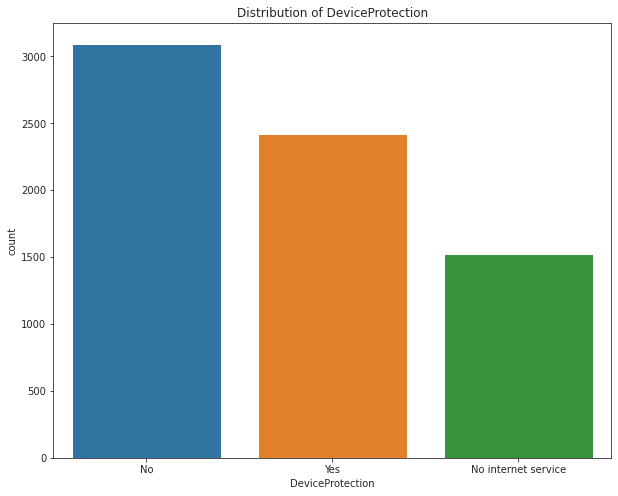

<Figure size 432x288 with 0 Axes>

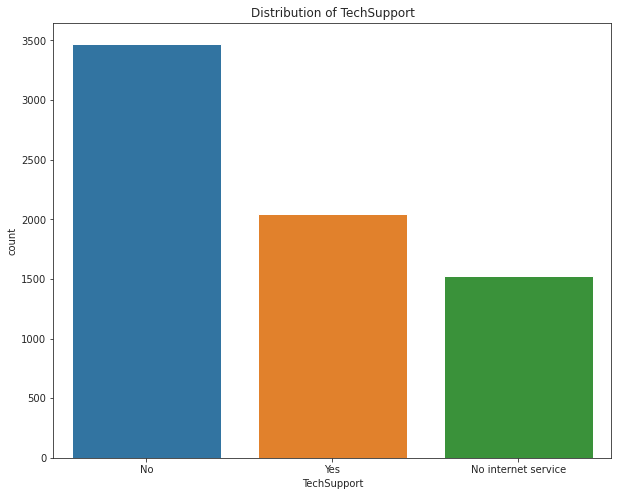

<Figure size 432x288 with 0 Axes>

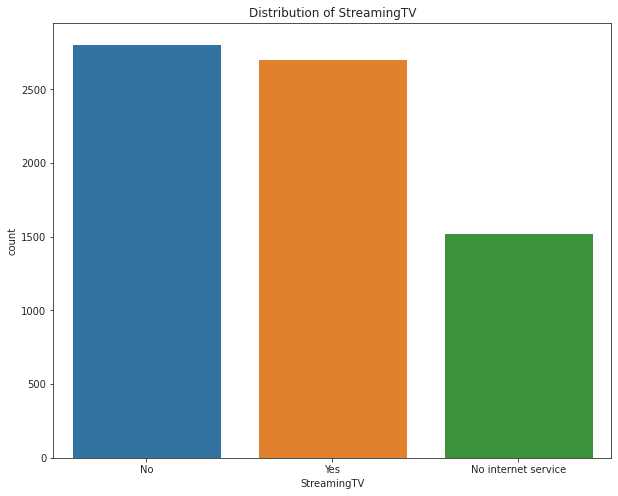

<Figure size 432x288 with 0 Axes>

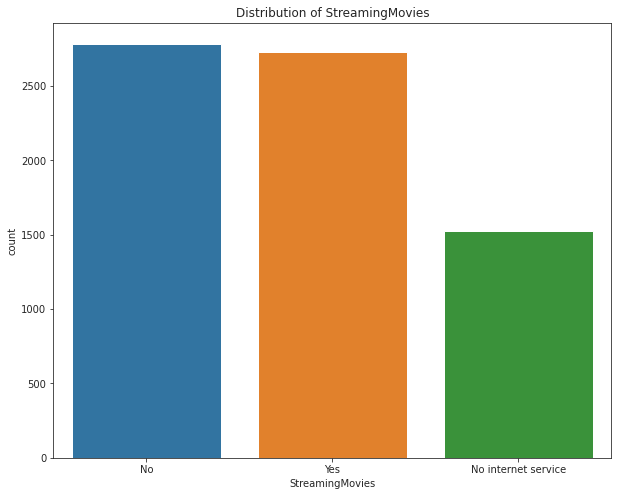

In [ ]:
uni_plot(internetser_count)

Text(0.5, 1.0, 'Distribution of tenure_group')

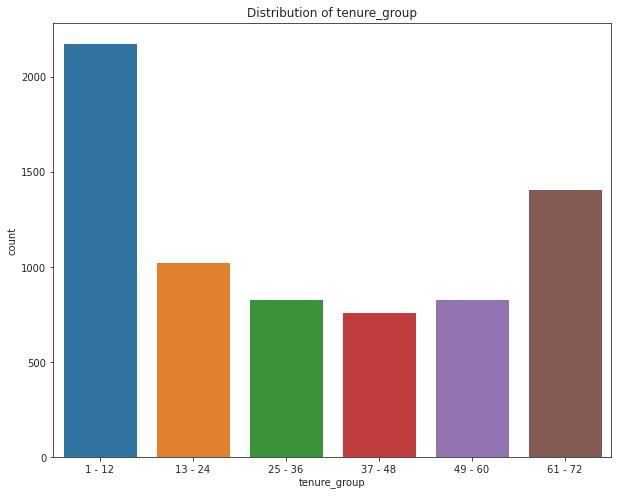

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df_data['tenure_group'])
plt.title(f"Distribution of tenure_group")

Text(0.5, 1.0, 'Distribution of tenure_group')

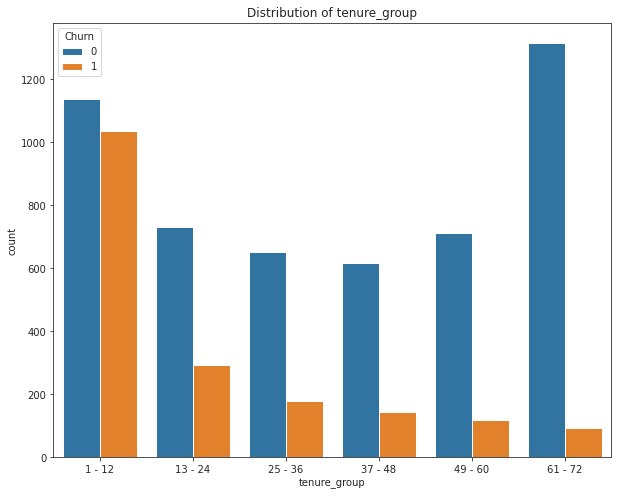

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df_data['tenure_group'], hue=df_data["Churn"])
plt.title(f"Distribution of tenure_group")

### Bivariate Analysis


In [ ]:
# Put the columns into groups 
customer_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', "Churn"]
contract_col = [ 'Contract', 'PaperlessBilling', 'PaymentMethod', "Churn"] #  'MonthlyCharges', 'TotalCharges' is not catagories col.
phoneser_col = ['PhoneService', 'MultipleLines', "Churn"]
internetser_col = [ 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', "Churn"]

In [ ]:
def category_plot(categorical_list):
  df_categoric = df.loc[:, categorical_list]
  for i in categorical_list:
    plt.figure()
    plt.figure(figsize=(10,8))
    sns.countplot(x = i, data = df_categoric, hue = "Churn")
    plt.title(f'{i} in term of CHURN')
    # plt.xticks(rotation = 45)

<Figure size 432x288 with 0 Axes>

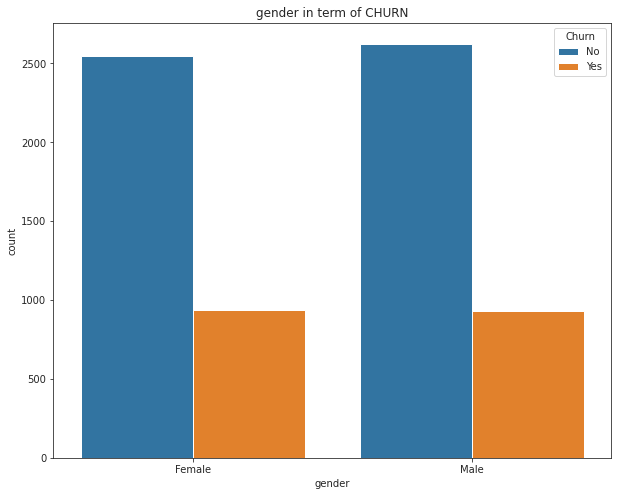

<Figure size 432x288 with 0 Axes>

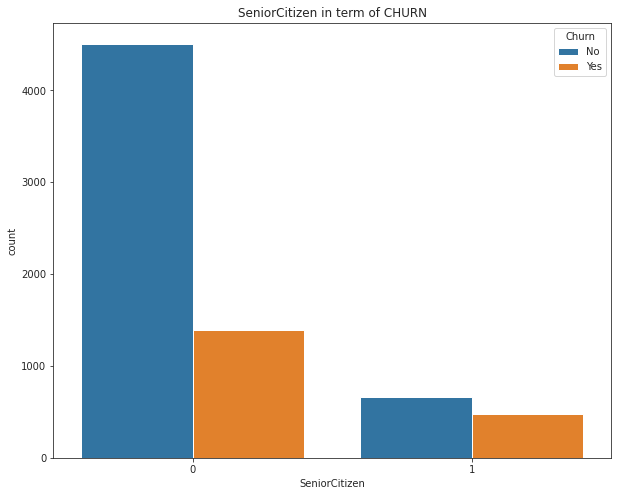

<Figure size 432x288 with 0 Axes>

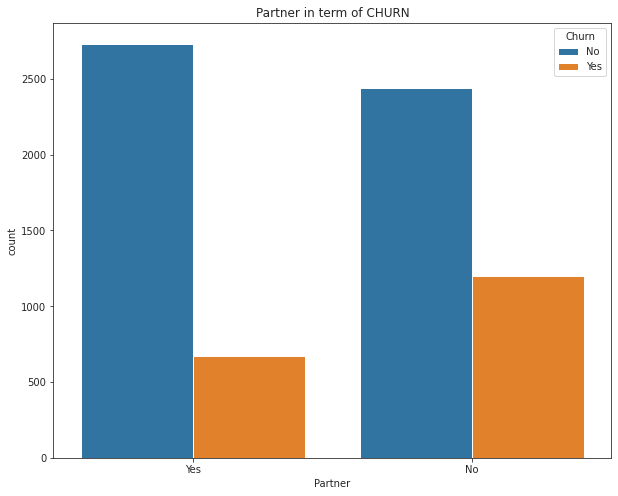

<Figure size 432x288 with 0 Axes>

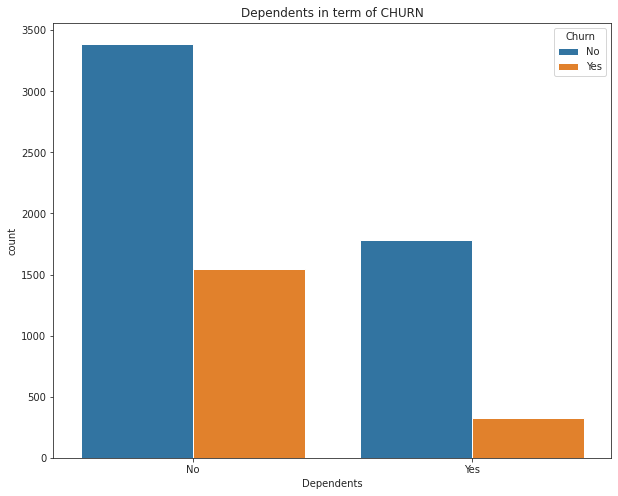

<Figure size 432x288 with 0 Axes>

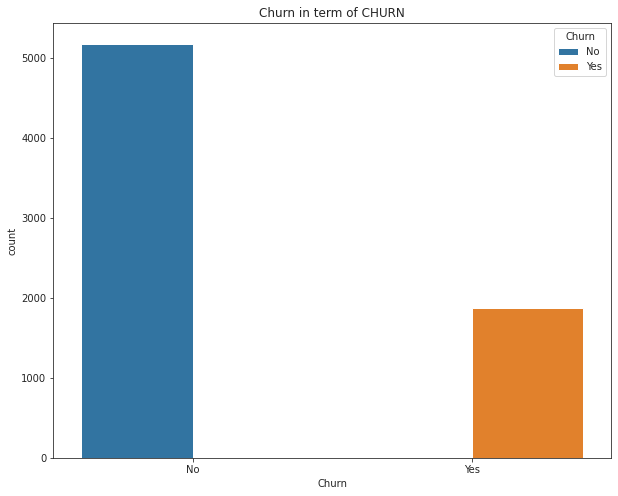

In [ ]:
category_plot(customer_col)

**Observation:**
- If the customer is a Senior Citizen, seems to have a higher churn ratio,
- If the customer does not have partner, seems like having higher probrobility leave to leave the company, the same case shows on dependents. Maybe for this part of customer, stable is not their first thing to consider.  


<Figure size 432x288 with 0 Axes>

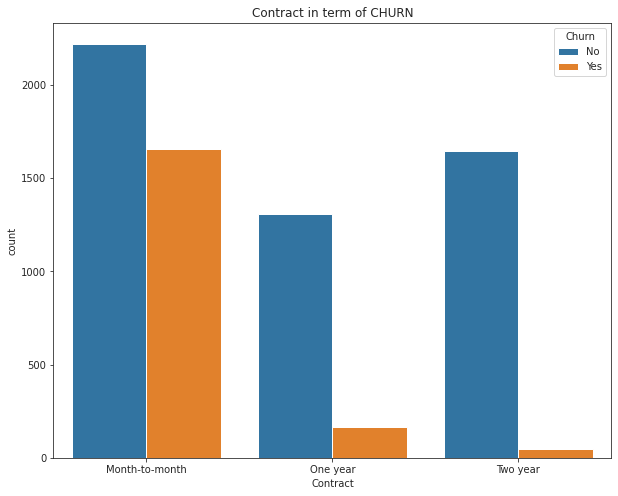

<Figure size 432x288 with 0 Axes>

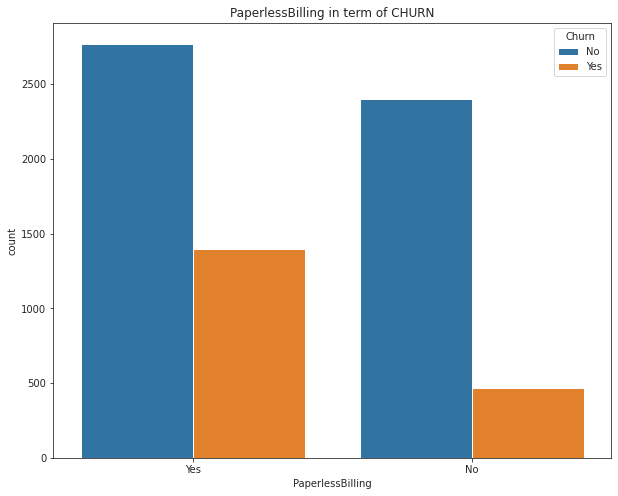

<Figure size 432x288 with 0 Axes>

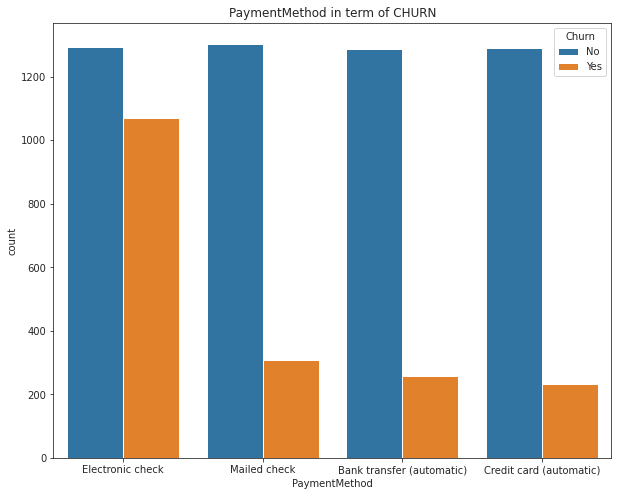

<Figure size 432x288 with 0 Axes>

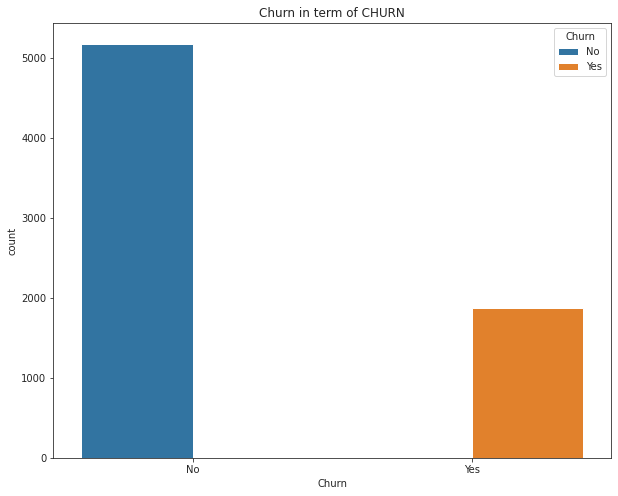

In [ ]:
category_plot(contract_col)

**Observation:**
- As expected, customers with short-term contract are more likely to churn, vice versa.
- Customers who pay with electronic check also are more likely to leave, while when it comes to a compare with other payment types, electronic check is more common, we have to go deeper to check is there a relationship between them.


<Figure size 432x288 with 0 Axes>

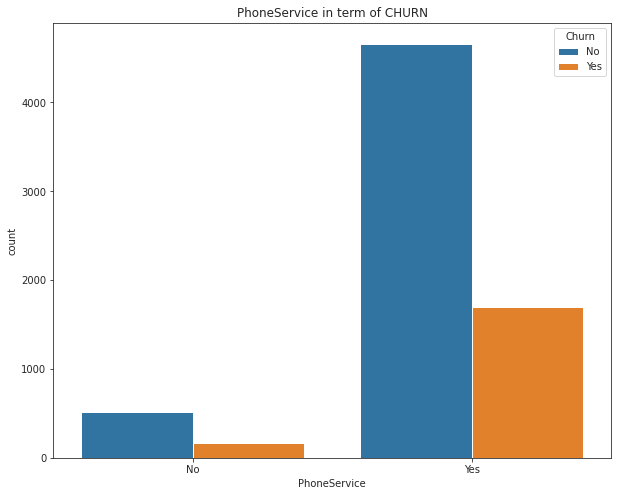

<Figure size 432x288 with 0 Axes>

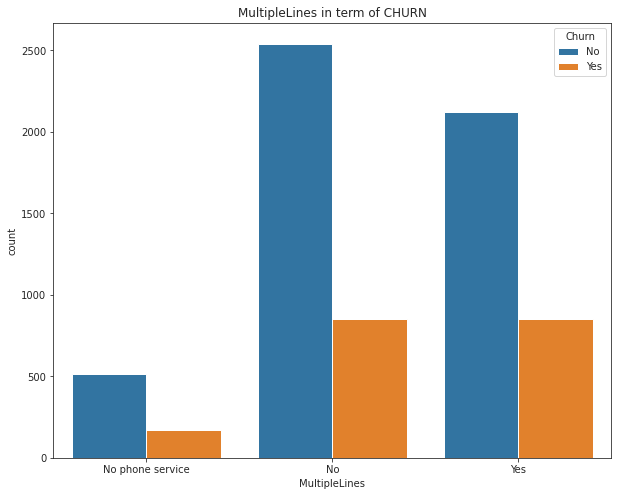

<Figure size 432x288 with 0 Axes>

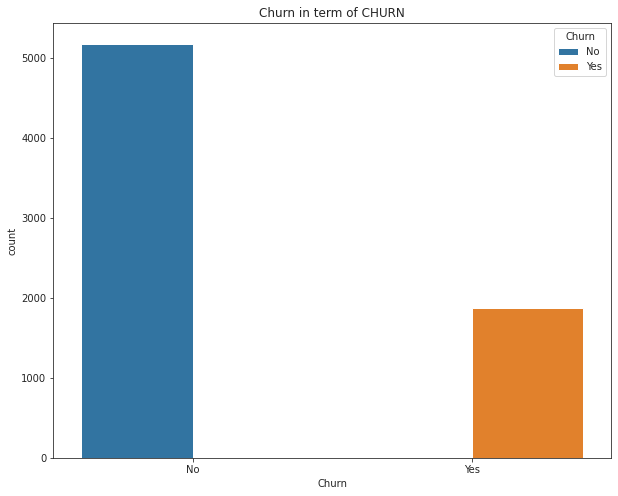

In [ ]:
category_plot(phoneser_col)

**Observation:**
- Most of the customers are using the phone service provided by the company>


<Figure size 432x288 with 0 Axes>

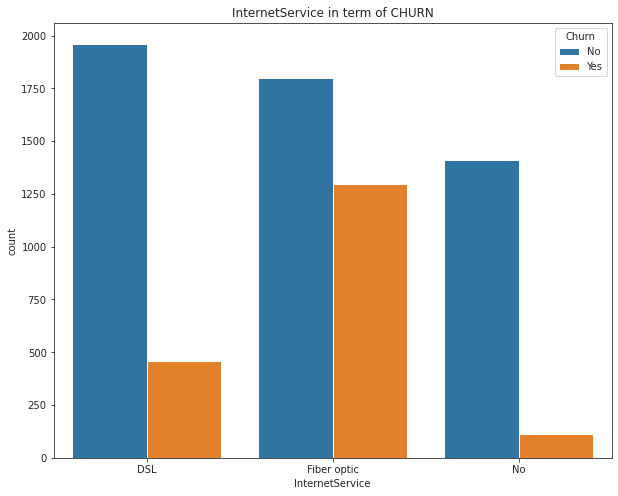

<Figure size 432x288 with 0 Axes>

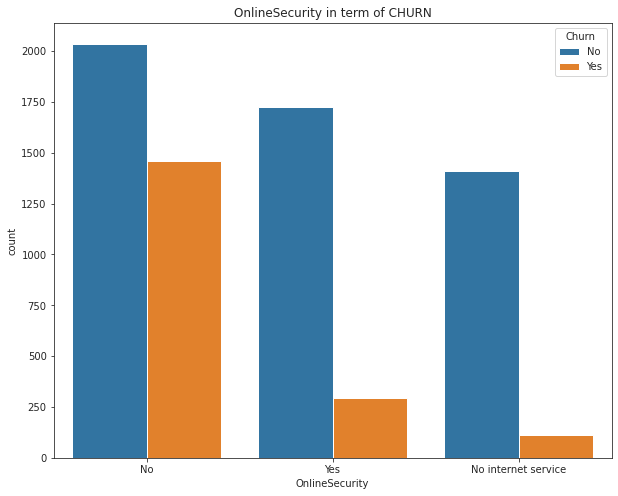

<Figure size 432x288 with 0 Axes>

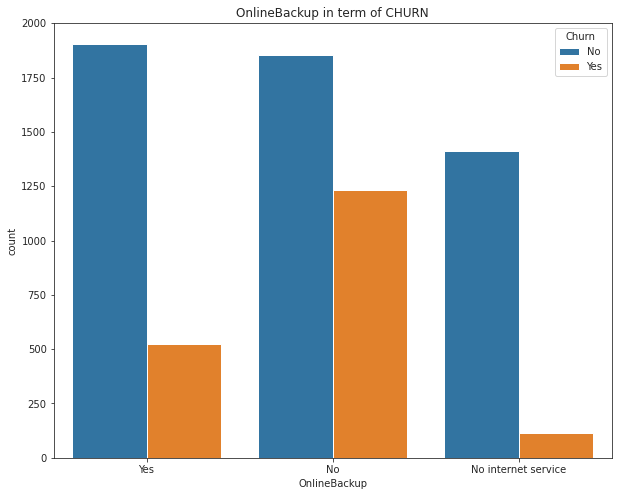

<Figure size 432x288 with 0 Axes>

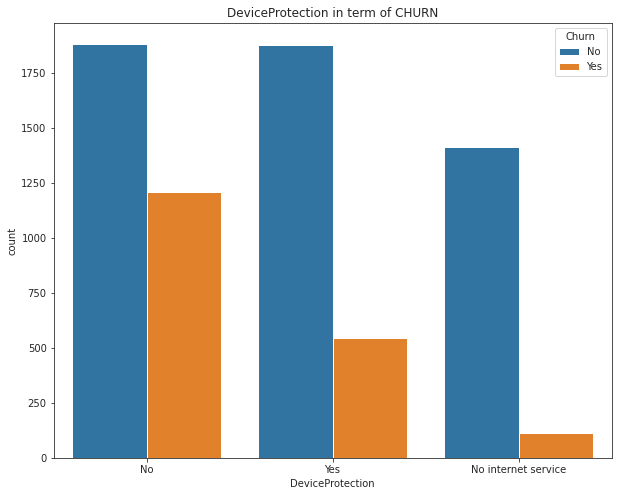

<Figure size 432x288 with 0 Axes>

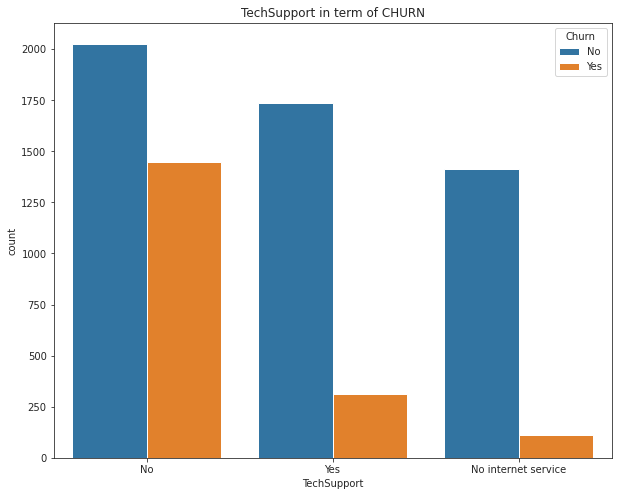

<Figure size 432x288 with 0 Axes>

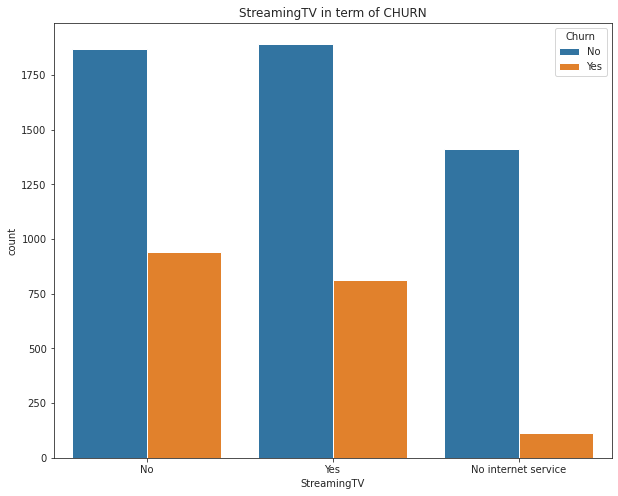

<Figure size 432x288 with 0 Axes>

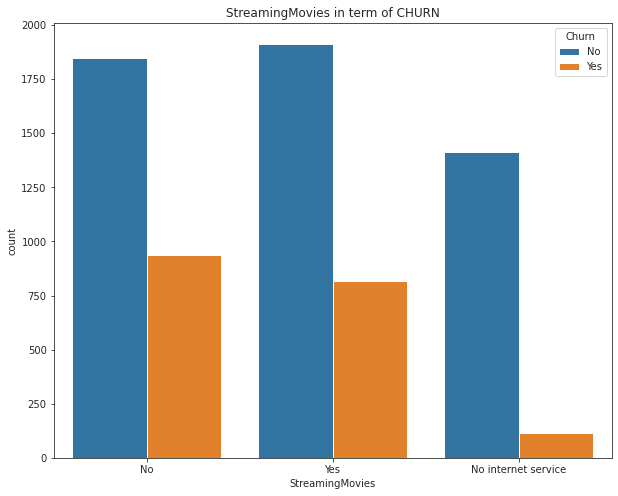

<Figure size 432x288 with 0 Axes>

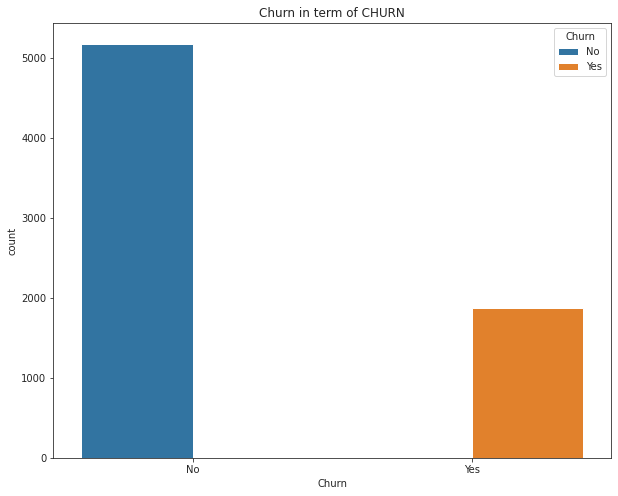

In [ ]:
category_plot(internetser_col)

**Observation:**
- Customers who uses fiber optic internet service are much likely to churn among three kind of internet connection service, maybe something wrong with the company's fiber optic service? 



### Data Converting

#### Feature variable

In [ ]:
df_data['gender'] = df_data['gender'].map({"Male":1,"Female":0}).astype("int")
df_data["Partner"] = df_data["Partner"].map({"No":0,"Yes":1}).astype("int")
df_data["Dependents"] = df_data["Dependents"].map({"No":0,"Yes":1}).astype("int")
df_data["PhoneService"] = df_data["PhoneService"].map({"No":0,"Yes":1}).astype("int")
df_data["PaperlessBilling"] = df_data["PaperlessBilling"].map({"No":0,"Yes":1}).astype("int")


#### Target variable

In [ ]:
df_data["Churn"] = df_data["Churn"].map({"Yes":1, "No":0}).astype("int")

# another way to convert
# df_data["Churn"] = np.where(df_data["Churn"] == "Yes", 1, 0)

In [ ]:
df_data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,1,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,1,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,1,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,0,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,13 - 24
7039,0,0,1,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,0,0,1,1,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,1 - 12
7041,1,1,1,0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,1 - 12


#### Catagorical columns

In [ ]:
data_dummies = pd.get_dummies(df_data)

In [ ]:
data_dummies

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
7039,0,0,1,1,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
7040,0,0,1,1,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
7041,1,1,1,0,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


Text(0.5, 1.0, 'Monthly charges by churn')

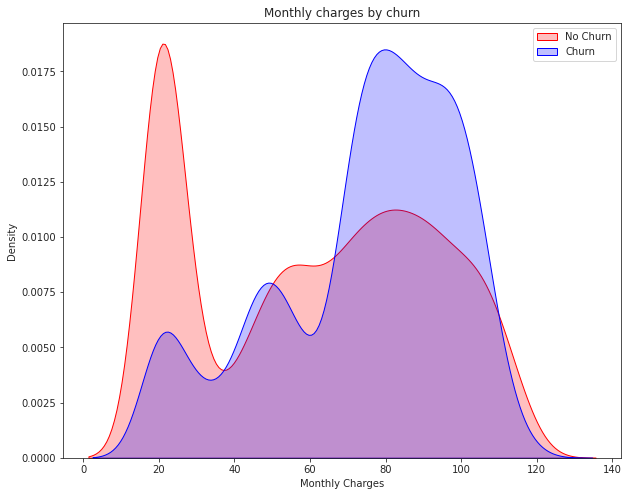

In [ ]:
plt.figure(figsize=(10,8))
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Observation:**
- More churn in higher monthly charges, this maybe related to the fiber optic case since normally fiber optic is more expensive then others internet services.

Text(0.5, 1.0, 'Total charges by churn')

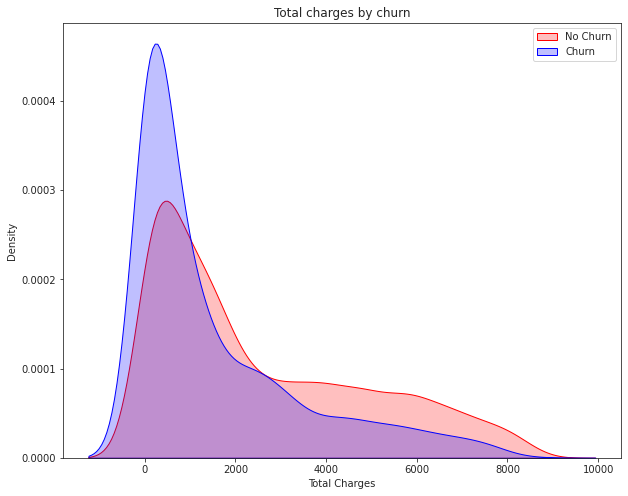

In [ ]:
plt.figure(figsize=(10,8))
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Observation:**
- Higher churn in lower total charges, which is surprising.

### Data Correlation 

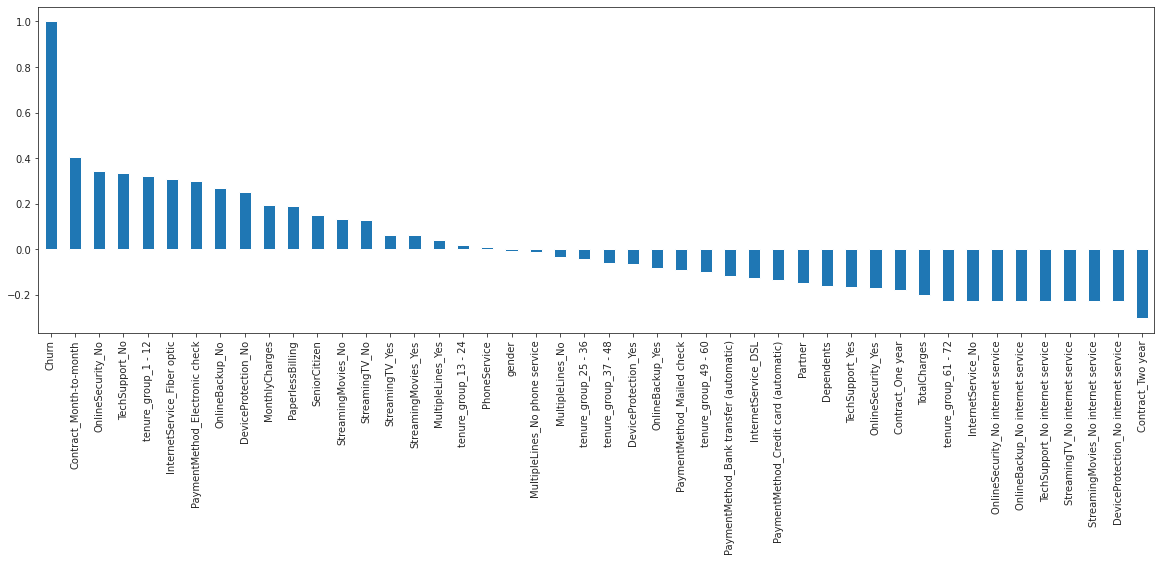

In [ ]:
plt.figure(figsize=(20,6))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Observation:
- Features help to lower the churn rate:
  - Longer in Contract term and tenure,
  - No internet service in "Device Protection", "Streaming Movies", "Streaming TV", "Tech Support", "Online Backup", "Online Security"

- Features that have a positive relation with churn rete:
  - Monthly Contract term, short tenure remains,
  - Have internet but doesn't use the "Online Security", "Tech Support", "Online Backup", "Device Protection"

### Observation Sum-up
- If customers are does not have partner, imdependent, they are more likely to churn.
- If customers with short tenure remains, and having monthly contract with the company, they are more likely to churn.
- If the customers are uses fiber optic internet services, they are more likely to churn among all.


In [ ]:
data_dummies.to_csv("telecom-churn_dummies_2.csv",index=False)

In [ ]:
from google.colab import files
files.download("telecom-churn_dummies_2.csv")

#### **Prepare a set of data to build Base Model**

In [ ]:
# base = pd.read_csv("/content/drive/MyDrive/Kaggle/Telecom-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# base['TotalCharges'] = pd.to_numeric(base['TotalCharges'], errors='coerce')

In [ ]:
# base.dropna(inplace=True)

In [ ]:
# base["Churn"] = base["Churn"].map({"Yes":1, "No":0}).astype("int")

In [ ]:
# base

In [ ]:
# base.to_csv("telecom-churn_base.csv",index=False)

# from google.colab import files
# files.download("telecom-churn_base.csv")